#A LOGISTIC REGRESSION MODEL ON WHAT PRODUCT KENYAN RETAILERS SHOULD STOCK IN AN INFLATIONARY MARKET.

#Problem statement.

With high inflationary environment and high cost of goods,  consumers are facing pressure on what retail goods to prioritize over. This makes it hard for retailers who are also budgeting for what goods to stock up on to prevent massive losses and to hopefully ride out the harsh economic times.


**Objectives.**


*   To find relevant data for the study.
* To identify features necessary for this model
* To create  the model
*  To test this data on a test data set

**Aim.**

The aim of this project is to create a model for small or large scale retailers to use, so as to identify what products to stock up on based on the products qualities and consumer behavior as the features, and an aggregate score as a target.

#DATA
The data used in the study was generated from mockaroo all with values ranging from 0 to 1 so as to indicate the quantitative value of the features used in probability form.

#Features
Features used in the data include: 'Brand Loyalty',	'Purchase Frequency',	'Profit margin',	'Quality',	'sale opportunities',	'resale value',  'after sale service', 	'competition',  'Tax rate', 	'score'. All being factors that affect the products perfomance in the market and also reflect consumer behaviour.
Products that contain these features include:
* Convenience products
* Shopping products
* Specialty products
* Unsought products


The 'score' column is an aggregate of all the features and subtracting features that are undesirable or would be costly for a retailer eg. 'after sale service', 	'competition',  'Tax rate'. 


**Logistic Regression Assumptions**

 

*   The independent variables should be independent of each other. That is, the model should have little or no multicollinearity. 

*   Binary logistic regression requires the dependent variable to be binary.
*   For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.


*   Only the meaningful variables should be included.

*   The independent variables are linearly related to the log odds.
Logistic regression requires quite large samp




#I will be using the imported libraries below 


In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



#This is how to open the data using pandas module.

In [2]:
df = pd.read_csv("/content/PROJECT_DATA.csv")
df

,Brand Loyalty,Purchase Frequency,Profit margin,Quality,sale opportunities,resale value,after sale service,competition,Tax rate,score
0,0.82,0.07,0.18,0.19,0.12,0.46,0.24,0.06,0.30,1.24
1,0.77,0.40,0.69,0.10,0.03,0.01,0.02,0.51,0.13,1.34
2,0.01,0.79,0.84,0.09,0.10,0.53,0.03,0.41,0.19,1.73
3,0.83,0.40,0.66,0.42,0.32,0.11,0.16,0.13,0.01,2.44
4,0.67,0.96,0.67,0.40,0.22,0.44,0.04,0.47,0.24,2.61
...,...,...,...,...,...,...,...,...,...,...
95,0.58,0.83,0.93,0.47,0.59,0.05,0.16,0.45,0.29,2.55
96,0.32,0.97,0.59,0.42,0.29,0.16,0.20,0.09,0.19,2.27
97,0.91,0.65,0.98,0.92,0.37,0.08,0.05,0.05,0.24,3.57
98,0.38,0.97,0.75,0.16,0.44,0.45,0.03,0.31,0.03,2.78


#Exploratory  analysis

In [3]:
print(df.columns)
print(df.shape)
df.describe




Index(['Brand Loyalty', 'Purchase Frequency', 'Profit margin', 'Quality',
       'sale opportunities', 'resale value', 'after sale service',
       'competition', 'Tax rate', 'score'],
      dtype='object')
(100, 10)


<bound method NDFrame.describe of     Brand Loyalty  Purchase Frequency  Profit margin  Quality  \
0            0.82                0.07           0.18     0.19   
1            0.77                0.40           0.69     0.10   
2            0.01                0.79           0.84     0.09   
3            0.83                0.40           0.66     0.42   
4            0.67                0.96           0.67     0.40   
..            ...                 ...            ...      ...   
95           0.58                0.83           0.93     0.47   
96           0.32                0.97           0.59     0.42   
97           0.91                0.65           0.98     0.92   
98           0.38                0.97           0.75     0.16   
99           0.57                0.49           0.65     0.55   

    sale opportunities  resale value  after sale service  competition  \
0                 0.12          0.46                0.24         0.06   
1                 0.03          0.01   

#Plotting a histogram to visualize the distribution of the scores.

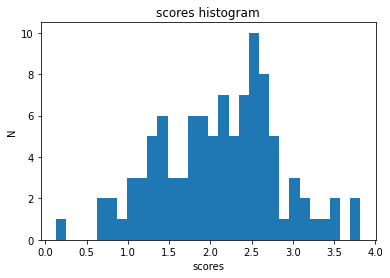

In [4]:
plt.hist(df.score, bins=30)
plt.title("scores histogram")
plt.ylabel("N")
plt.xlabel("scores")
plt.show()

Since the scores determine the suitability of the product, the higher the score means the better chance a retailer has to selling it.
Thus scores of 2.3 or higher are for products that should get stocked and below that should not be stocked.
 

#The code below creates a new column 'label' that has binary values of 1 and 0, 1 being 'product to stock', 0 being 'Not to stock'

In [7]:
df['label'] = (df.score >= 2.3).astype(int)
df

,Brand Loyalty,Purchase Frequency,Profit margin,Quality,sale opportunities,resale value,after sale service,competition,Tax rate,score,label
0,0.82,0.07,0.18,0.19,0.12,0.46,0.24,0.06,0.30,1.24,0
1,0.77,0.40,0.69,0.10,0.03,0.01,0.02,0.51,0.13,1.34,0
2,0.01,0.79,0.84,0.09,0.10,0.53,0.03,0.41,0.19,1.73,0
3,0.83,0.40,0.66,0.42,0.32,0.11,0.16,0.13,0.01,2.44,1
4,0.67,0.96,0.67,0.40,0.22,0.44,0.04,0.47,0.24,2.61,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.58,0.83,0.93,0.47,0.59,0.05,0.16,0.45,0.29,2.55,1
96,0.32,0.97,0.59,0.42,0.29,0.16,0.20,0.09,0.19,2.27,0
97,0.91,0.65,0.98,0.92,0.37,0.08,0.05,0.05,0.24,3.57,1
98,0.38,0.97,0.75,0.16,0.44,0.45,0.03,0.31,0.03,2.78,1


#Plot to show our target distribution as binary

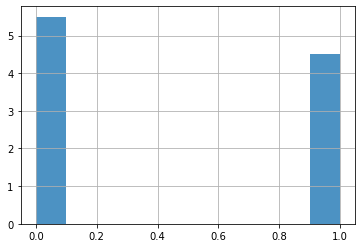

In [8]:
df[df.columns[-1]].hist(alpha=0.8, density=True)
plt.show()


**FEATURE ENGINEERING**



correlation of the dataset

In [9]:
df.corr()

,Brand Loyalty,Purchase Frequency,Profit margin,Quality,sale opportunities,resale value,after sale service,competition,Tax rate,score,label
Brand Loyalty,1.000000,-0.101671,-0.006980,0.034071,0.085565,0.139614,0.078126,-0.054073,-0.042436,0.482141,0.478713
Purchase Frequency,-0.101671,1.000000,0.091421,-0.209296,0.059011,-0.028495,-0.038012,-0.169057,0.019991,0.361426,0.262128
Profit margin,-0.006980,0.091421,1.000000,0.030865,-0.155792,-0.081427,-0.153039,-0.110161,-0.135504,0.429334,0.352632
Quality,0.034071,-0.209296,0.030865,1.000000,-0.060314,0.104439,-0.027552,-0.028433,0.005185,0.377711,0.328029
sale opportunities,0.085565,0.059011,-0.155792,-0.060314,1.000000,-0.055600,0.287491,0.036727,-0.005270,0.284945,0.221437
resale value,0.139614,-0.028495,-0.081427,0.104439,-0.055600,1.000000,0.003971,0.026721,0.070764,0.270554,0.204888
after sale service,0.078126,-0.038012,-0.153039,-0.027552,0.287491,0.003971,1.000000,-0.021367,0.073444,-0.054470,-0.010961
competition,-0.054073,-0.169057,-0.110161,-0.028433,0.036727,0.026721,-0.021367,1.000000,0.131046,-0.421436,-0.214120
Tax rate,-0.042436,0.019991,-0.135504,0.005185,-0.005270,0.070764,0.073444,0.131046,1.000000,-0.210066,-0.106905
score,0.482141,0.361426,0.429334,0.377711,0.284945,0.270554,-0.054470,-0.421436,-0.210066,1.000000,0.793441


The data above shows the correlation between all the columns, and since we are intrested in predicting the label, we find 3 columns that have a negative correlation with the label, and thus not useful in the model. This columns are 'after sale service',	'competition',	'Tax rate'.

Also the 'scores' column has a correlation of 0.79 which is high compared to the label, this isn't a surprise since the score was used to generate the values of the final label. 
Its then necessary to drop it because using it as a feature is almost like allowing our model to cheat.



In [10]:
#dropping the 3 columns
df = df.drop(['after sale service','competition','Tax rate','score'], axis=1)
df

,Brand Loyalty,Purchase Frequency,Profit margin,Quality,sale opportunities,resale value,label
0,0.82,0.07,0.18,0.19,0.12,0.46,0
1,0.77,0.40,0.69,0.10,0.03,0.01,0
2,0.01,0.79,0.84,0.09,0.10,0.53,0
3,0.83,0.40,0.66,0.42,0.32,0.11,1
4,0.67,0.96,0.67,0.40,0.22,0.44,1
...,...,...,...,...,...,...,...
95,0.58,0.83,0.93,0.47,0.59,0.05,1
96,0.32,0.97,0.59,0.42,0.29,0.16,0
97,0.91,0.65,0.98,0.92,0.37,0.08,1
98,0.38,0.97,0.75,0.16,0.44,0.45,1


# Splitting the data into features(X) and Target(Y)

In [11]:
X = df[df.columns[:-1]].values
Y = df[[df.columns[-1]]].values

#confirming split
print(X.shape)
print(Y.shape)

(100, 6)
(100, 1)


#Splitting the data  to test and train sets

The training data is set to be 75% of the data and the testing data as 25%.
The training data should contain 75 rows x 6 columns, while
the testing data should have 25 rows x 1 column


In [12]:
x_test, x_train, y_test, y_train = train_test_split(X, Y, random_state=0, test_size = .75)

#confirming split
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(25, 6)
(75, 6)
(25, 1)
(75, 1)


#Instatiating logistic regression


In [13]:
model = LogisticRegression() 


# .ravel method changes the shape of y to remove data conversion anormalies
model.fit(x_train,y_train.ravel())


LogisticRegression()

#Using the model to predict given our test data feature


In [14]:
predict_test = model.predict(x_test)
print("Evaluated test_predictions:", predict_test)

Evaluated test_predictions: [1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0]


#Determining an accuracy score of the model given our test target


In [15]:

accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.88


#Creating a classification report

In [18]:

print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.82      0.90      0.86        10

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



#Conclusion

The objectives set out were achieved, the appropriate features were used, a regression 
model fitted on the data and an accuracy of 0.88 achieved when testing the model on the test dataset. 


#Follow up study

* More features to be added so as to make the model more robust.
* Find good ways of quantifying consumer behaviour for a more accurate model

#Refferences.




1. https://www.marketingstudyguide.com/list-examples-classifying-consumer-products/
2. https://www.mckinsey.com/industries/retail/our-insights/navigating-inflation-in-retail-six-actions-for-retailers
3. https://www.marketresearch.com/seek/Consumer-Goods-Kenya/1596/1177/1.html
4. https://www.geopoll.com/blog/fmcg-consumer-behavior-kenya/
5. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
6. https://www.ashokcharan.com/Marketing-Analytics/~cm-categories.php 
7. https://androidkt.com/find-correlation-between-features-and-target-using-the-correlation-matrix/#:~:text=You%20can%20evaluate%20the%20relationship,the%20target%20variable%20or%20not.

**END!**